# Задача
Провести разведочный анализ данных из файлов "/historical_currency_exchange.parquet" и "/transaction_fraud_data.parquet", придумать продуктовые и технические гипотезы — какую ценность можете извлечь из данных для организации, которая предоставила данные.

## Загрузка и осмотр данных

### Подзадача:
Загрузить данные из файлов "/historical_currency_exchange.parquet" и "/transaction_fraud_data.parquet" и осмотреть их структуру и содержимое, чтобы понять, какую информацию они содержат.



In [ ]:
# Загрузка данных о мошеннических транзакциях и осмотр

# Импортируем библиотеку pandas
import pandas as pd

# Путь к файлу с данными о мошеннических транзакциях
fraud_file = "/transaction_fraud_data.parquet"

# Загрузка данных из parquet файла
try:
    df_fraud = pd.read_parquet(fraud_file)
    print(f"Успешно загружен файл: {fraud_file}")

    # Выводим первые 5 строк DataFrame
    print("\nПервые 5 строк DataFrame с данными о мошеннических транзакциях:")
    display(df_fraud.head())

    # Выводим информацию о DataFrame (типы данных, пропущенные значения)
    print("\nИнформация о DataFrame с данными о мошеннических транзакциях:")
    df_fraud.info()

except FileNotFoundError:
    print(f"Ошибка: Файл не найден по пути {fraud_file}")
except Exception as e:
    print(f"Произошла ошибка при загрузке файла {fraud_file}: {e}")

Успешно загружен файл: /transaction_fraud_data.parquet

Первые 5 строк DataFrame с данными о мошеннических транзакциях:


,transaction_id,customer_id,card_number,timestamp,vendor_category,vendor_type,vendor,amount,currency,country,...,is_card_present,device,channel,device_fingerprint,ip_address,is_outside_home_country,is_high_risk_vendor,is_weekend,last_hour_activity,is_fraud
0,TX_a0ad2a2a,CUST_72886,6646734767813109,2024-09-30 00:00:01.034820,Restaurant,fast_food,Taco Bell,294.87,GBP,UK,...,False,iOS App,mobile,e8e6160445c935fd0001501e4cbac8bc,197.153.60.199,False,False,False,"{'num_transactions': 1197, 'total_amount': 334...",False
1,TX_3599c101,CUST_70474,376800864692727,2024-09-30 00:00:01.764464,Entertainment,gaming,Steam,3368.97,BRL,Brazil,...,False,Edge,web,a73043a57091e775af37f252b3a32af9,208.123.221.203,True,True,False,"{'num_transactions': 509, 'total_amount': 2011...",True
2,TX_a9461c6d,CUST_10715,5251909460951913,2024-09-30 00:00:02.273762,Grocery,physical,Whole Foods,102582.38,JPY,Japan,...,False,Firefox,web,218864e94ceaa41577d216b149722261,10.194.159.204,False,False,False,"{'num_transactions': 332, 'total_amount': 3916...",False
3,TX_7be21fc4,CUST_16193,376079286931183,2024-09-30 00:00:02.297466,Gas,major,Exxon,630.60,AUD,Australia,...,False,iOS App,mobile,70423fa3a1e74d01203cf93b51b9631d,17.230.177.225,False,False,False,"{'num_transactions': 764, 'total_amount': 2201...",False
4,TX_150f490b,CUST_87572,6172948052178810,2024-09-30 00:00:02.544063,Healthcare,medical,Medical Center,724949.27,NGN,Nigeria,...,False,Chrome,web,9880776c7b6038f2af86bd4e18a1b1a4,136.241.219.151,True,False,False,"{'num_transactions': 218, 'total_amount': 4827...",True



Информация о DataFrame с данными о мошеннических транзакциях:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7483766 entries, 0 to 7483765
Data columns (total 23 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   transaction_id           object        
 1   customer_id              object        
 2   card_number              int64         
 3   timestamp                datetime64[us]
 4   vendor_category          object        
 5   vendor_type              object        
 6   vendor                   object        
 7   amount                   float64       
 8   currency                 object        
 9   country                  object        
 10  city                     object        
 11  city_size                object        
 12  card_type                object        
 13  is_card_present          bool          
 14  device                   object        
 15  channel                  object        
 16  device_fi

In [ ]:
# Загрузка данных об историческом обмене валют и осмотр

# Путь к файлу с данными об историческом обмене валют
currency_file = "/historical_currency_exchange.parquet"

# Загрузка данных из parquet файла
try:
    df_currency = pd.read_parquet(currency_file)
    print(f"Успешно загружен файл: {currency_file}")

    # Выводим первые 5 строк DataFrame
    print("\nПервые 5 строк DataFrame с данными об историческом обмене валют:")
    display(df_currency.head())

    # Выводим информацию о DataFrame (типы данных, пропущенные значения)
    print("\nИнформация о DataFrame с данными об историческом обмене валют:")
    df_currency.info()

except FileNotFoundError:
    print(f"Ошибка: Файл не найден по пути {currency_file}")
except Exception as e:
    print(f"Произошла ошибка при загрузке файла {currency_file}: {e}")

Успешно загружен файл: /historical_currency_exchange.parquet

Первые 5 строк DataFrame с данными об историческом обмене валют:


,date,AUD,BRL,CAD,EUR,GBP,JPY,MXN,NGN,RUB,SGD,USD
0,2024-09-30,1.443654,5.434649,1.351196,0.895591,0.747153,142.573268,19.694724,1668.736400,94.133735,1.280156,1
1,2024-10-01,1.442917,5.444170,1.352168,0.897557,0.746956,143.831429,19.667561,1670.694524,92.898519,1.284352,1
2,2024-10-02,1.449505,5.425444,1.348063,0.903056,0.752241,143.806861,19.606748,1669.653006,94.583198,1.286983,1
3,2024-10-03,1.456279,5.442044,1.351451,0.906018,0.754584,146.916773,19.457701,1670.097873,95.655442,1.294391,1
4,2024-10-04,1.460930,5.477788,1.355260,0.906452,0.761891,146.592323,19.363467,1649.763738,94.755337,1.296800,1



Информация о DataFrame с данными об историческом обмене валют:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    31 non-null     object 
 1   AUD     31 non-null     float64
 2   BRL     31 non-null     float64
 3   CAD     31 non-null     float64
 4   EUR     31 non-null     float64
 5   GBP     31 non-null     float64
 6   JPY     31 non-null     float64
 7   MXN     31 non-null     float64
 8   NGN     31 non-null     float64
 9   RUB     31 non-null     float64
 10  SGD     31 non-null     float64
 11  USD     31 non-null     int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 3.0+ KB


## Анализ данных

### Подзадача:
Провести разведочный анализ данных о мошеннических транзакциях.

**Обоснование**:
Исследовать распределение мошеннических транзакций, посмотреть на статистику по сумме транзакций для мошеннических и немошеннических операций, а также изучить распределение транзакций по различным категориям (например, по типу продавца, стране, устройству и т.д.).

In [ ]:
# Анализ данных о мошеннических транзакциях

# 1. Распределение мошеннических и немошеннических транзакций
print("Распределение мошеннических транзакций:")
display(df_fraud['is_fraud'].value_counts())
print("\nПроцент мошеннических транзакций:")
display(df_fraud['is_fraud'].value_counts(normalize=True) * 100)

# 2. Статистика по сумме транзакций для мошеннических и немошеннических операций
print("\nСтатистика по сумме транзакций (amount) для мошеннических и немошеннических операций:")
display(df_fraud.groupby('is_fraud')['amount'].describe())

# 3. Исследование распределения транзакций по некоторым категориальным признакам
print("\nРаспределение транзакций по типу продавца (vendor_type):")
display(df_fraud['vendor_type'].value_counts().head())

print("\nРаспределение транзакций по стране (country):")
display(df_fraud['country'].value_counts().head())

print("\nРаспределение транзакций по устройству (device):")
display(df_fraud['device'].value_counts().head())

print("\nРаспределение транзакций по каналу (channel):")
display(df_fraud['channel'].value_counts().head())

# Дополнительно: можно исследовать другие признаки, такие как vendor_category, city_size, card_type и т.д.

Распределение мошеннических транзакций:


,count
is_fraud,
False,5989047
True,1494719



Процент мошеннических транзакций:


,proportion
is_fraud,
False,80.027182
True,19.972818



Статистика по сумме транзакций (amount) для мошеннических и немошеннических операций:


,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
False,5989047.0,30242.538284,87656.818774,17.95,368.220,903.51,14535.93,1240629.47
True,1494719.0,118773.589871,347542.933086,0.01,295.585,5626.06,63556.20,6253152.62



Распределение транзакций по типу продавца (vendor_type):


,count
vendor_type,
online,1401650
physical,935039
medical,468393
pharmacy,468377
local,467902



Распределение транзакций по стране (country):


,count
country,
Nigeria,849840
Brazil,804800
Russia,793730
Mexico,785704
Singapore,588668



Распределение транзакций по устройству (device):


,count
device,
Edge,1189560
iOS App,1143461
Chrome,1132384
Android App,1126117
Firefox,1120952



Распределение транзакций по каналу (channel):


,count
channel,
web,4563141
mobile,2269578
pos,651047


## Формулирование гипотез

### Подзадача:
Сформулировать продуктовые и технические гипотезы на основе анализа данных.

**Обоснование**:
Используя инсайты, полученные в ходе анализа данных о мошеннических транзакциях и историческом обмене валют, предложить гипотезы о том, как эти данные могут быть использованы для создания ценности для организации.

### Продуктовые гипотезы:

1.  **Гипотеза о повышенном риске в определенных странах и по типу продавца:** Мошеннические транзакции непропорционально часто происходят в определенных странах (например, Нигерия, Бразилия) и у определенных типов продавцов (например, онлайн). **Ценность:** Разработка более строгих правил верификации или лимитов для транзакций в этих сегментах может снизить уровень мошенничества.
2.  **Гипотеза о связи суммы транзакции с мошенничеством:** Мошеннические транзакции имеют значительно более высокие средние и медианные суммы по сравнению с легитимными. **Ценность:** Использование пороговых значений суммы транзакции или моделей машинного обучения, учитывающих сумму, может улучшить выявление мошенничества.
3.  **Гипотеза о влиянии времени суток/выходных на мошенничество:** Мошенничество может быть более распространено в определенное время суток или в выходные дни. **Ценность:** Адаптация правил мониторинга транзакций в зависимости от времени может повысить эффективность выявления.
4.  **Гипотеза о влиянии использования устройства и канала на мошенничество:** Распределение мошеннических транзакций по устройствам и каналам (web, mobile, pos) может указывать на уязвимости в определенных каналах. **Ценность:** Усиление мер безопасности для более рискованных каналов или устройств.
5.  **Гипотеза о связи между активностью за последний час и мошенничеством:** Аномальная активность (количество транзакций, общая сумма) за последний час может быть индикатором мошенничества. **Ценность:** Использование агрегированных признаков активности клиента за короткие промежутки времени в моделях обнаружения мошенничества.
6.  **Гипотеза о влиянии курсов валют на мошенничество:** Резкие колебания курсов валют могут коррелировать с увеличением мошеннических операций, особенно при транзакциях за пределами домашней страны. **Ценность:** Включение данных о динамике курсов валют в модель обнаружения мошенничества для выявления подозрительных операций, связанных с конвертацией.

### Технические гипотезы:

1.  **Гипотеза о создании признаков на основе временных рядов:** Создание признаков, агрегирующих активность клиента (количество транзакций, средняя/максимальная сумма) за различные временные интервалы (час, день, неделя), улучшит качество модели обнаружения мошенничества. **Ценность:** Повышение точности и снижение ложноположительных срабатываний системы антифрода.
2.  **Гипотеза об использовании данных о геолокации и IP-адресах:** Анализ связей между местоположением транзакции (город, страна), IP-адресом и домашней страной клиента может выявить аномальные паттерны, связанные с мошенничеством. **Ценность:** Улучшение способности системы антифрода выявлять транзакции, совершенные из необычных или рискованных местоположений.
3.  **Гипотеза о применении машинного обучения для выявления мошенничества:** Построение классификационной модели (например, с использованием градиентного бустинга или нейронных сетей) на основе имеющихся признаков, включая синтезированные, позволит автоматизировать процесс выявления мошенничества с высокой точностью. **Ценность:** Снижение ручной работы по разбору подозрительных транзакций и минимизация потерь от мошенничества.
4.  **Гипотеза об интеграции данных о курсах валют в систему антифрода:** Интеграция исторических и, возможно, актуальных данных о курсах валют позволит создать признаки, отражающие волатильность или аномалии в суммах транзакций при конвертации, улучшая детекцию. **Ценность:** Выявление нового типа мошенничества, связанного с манипуляциями на разнице курсов.
5.  **Гипотеза об использовании графовых структур:** Построение графа связей между клиентами, картами, устройствами, IP-адресами и продавцами может помочь выявить паттерны мошенничества, основанные на связанных сущностях. **Ценность:** Обнаружение сложных мошеннических схем, включающих множество участников.

# Задание
Провести разведочный анализ данных из файлов "/historical_currency_exchange.parquet" и "/transaction_fraud_data.parquet", придумать продуктовые и технические гипотезы о ценности данных для организации, предоставившей данные.

**Обоснование**:
Обработать пропущенные значения, подготовить признаки для машинного обучения, обработать категориальные переменные и разделить данные на обучающую и тестовую выборки для проверки технической гипотезы.

## Подготовка данных для проверки гипотез

### Подзадача:
Подготовить данные для проверки выбранных гипотез.

**Обоснование**:
 На этом шаге будет выполнен код для создания и объединения датафреймов, расчета столбца `amount_usd`, обработки пропущенных значений, парсинга столбца 'last_hour_activity', определения признаков и целевой переменной, выполнения one-hot кодирования, импутации оставшихся пропущенных значений и, наконец, разделения данных на обучающую и тестовую выборки.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import json

# 1. Загрузка данных
df_fraud = pd.read_parquet('/transaction_fraud_data.parquet')
df_currency = pd.read_parquet('/historical_currency_exchange.parquet')

# 2. Преобразование столбцов с датами в формат datetime
df_fraud['timestamp'] = pd.to_datetime(df_fraud['timestamp'])
df_currency['date'] = pd.to_datetime(df_currency['date'])

# 3. Подготовка df_currency для объединения: 'плавим' DataFrame, чтобы получить пары дата-валюта-курс
df_currency_melted = df_currency.melt(id_vars=['date'], var_name='currency', value_name='exchange_rate')
# Преобразуем дату в формат даты без времени для объединения
df_currency_melted['date'] = df_currency_melted['date'].dt.date

# 4. Объединение датафреймов df_fraud и df_currency_melted по дате и валюте
# Извлекаем дату из метки времени в df_fraud
df_fraud['date'] = df_fraud['timestamp'].dt.date
# Выполняем левое объединение, сохраняя все транзакции из df_fraud
df_merged = pd.merge(df_fraud, df_currency_melted, on=['date', 'currency'], how='left')

# 5. Расчет суммы транзакции в USD
# Делим сумму транзакции на соответствующий курс обмена
df_merged['amount_usd'] = df_merged['amount'] / df_merged['exchange_rate']

# 6. Обработка пропущенных значений
# Удаляем столбец с курсом после расчета amount_usd, так как он больше не нужен
df_merged.drop(columns=['exchange_rate'], inplace=True)
# Удаляем строки, где не удалось рассчитать amount_usd (например, из-за отсутствия курса)
df_merged.dropna(subset=['amount_usd'], inplace=True)
# Заполняем пропущенные значения в 'city_size' как 'unknown'
df_merged['city_size'] = df_merged['city_size'].fillna('unknown') # Исправлено предупреждение FutureWaarning

# 7. Парсинг last_hour_activity
# Функция для безопасного парсинга JSON строки
def parse_last_hour(activity):
    try:
        # Заменяем одинарные кавычки на двойные для корректного парсинга JSON
        activity_dict = json.loads(activity.replace("'", "\""))
        return pd.Series(activity_dict)
    except (json.JSONDecodeError, AttributeError, TypeError):
        # Возвращаем нулевые значения в случае ошибки парсинга или отсутствия данных
        return pd.Series({'num_transactions_last_hour': 0, 'total_amount_last_hour': 0.0})

# Применяем функцию парсинга к столбцу 'last_hour_activity'
last_hour_features = df_merged['last_hour_activity'].apply(parse_last_hour)

# Объединяем полученные признаки с основным датафреймом
df_merged = pd.concat([df_merged, last_hour_features], axis=1)

# Удаляем исходный столбец 'last_hour_activity'
df_merged.drop(columns=['last_hour_activity'], inplace=True)


# 8. Определение признаков (X) и целевой переменной (y)
# Исключаем идентификаторы, временные метки, исходную сумму/валюту, данные, которые не будем использовать напрямую, и целевую переменную 'is_fraud'
# Теперь включаем новые признаки из last_hour_activity
X = df_merged.drop(columns=['is_fraud', 'transaction_id', 'customer_id', 'card_number', 'timestamp', 'date', 'vendor', 'device_fingerprint', 'ip_address', 'city', 'amount', 'currency'])
y = df_merged['is_fraud'] # Целевая переменная - факт мошенничества

# 9. One-hot кодирование категориальных признаков
# Преобразуем категориальные признаки в числовой формат для моделей машинного обучения
X_encoded = pd.get_dummies(X, drop_first=True) # drop_first=True помогает избежать мультиколлинеарности

# 10. Импутация оставшихся пропущенных значений (если есть после one-hot кодирования)
# Используем SimpleImputer для заполнения пропущенных значений медианой
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X_encoded)
# Преобразуем обратно в DataFrame, сохраняя имена столбцов
X_processed = pd.DataFrame(X_imputed, columns=X_encoded.columns)


# 11. Разделение данных на обучающую и тестовую выборки
# Разделяем данные для обучения и тестирования модели
# stratify=y обеспечивает одинаковое соотношение классов (мошенничество/немошенничество) в обеих выборках
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42, stratify=y)

print("Данные успешно подготовлены и разделены на обучающую и тестовую выборки.")
print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

Данные успешно подготовлены и разделены на обучающую и тестовую выборки.
Размер обучающей выборки: (5238636, 56)
Размер тестовой выборки: (2245130, 56)


## Проверка технической гипотезы: Применение машинного обучения для выявления мошенничества

### Подзадача:
Построить базовую модель машинного обучения для выявления мошеннических транзакций и оценить ее производительность.

**Обоснование**:
Используя подготовленные данные, обучить простую классификационную модель (например, логистическую регрессию или случайный лес) на обучающей выборке и оценить ее способность выявлять мошеннические транзакции на тестовой выборке, чтобы проверить гипотезу о применимости машинного обучения.

In [ ]:
# Проверка технической гипотезы: Применение машинного обучения для выявления мошенничества

# Импортируем необходимые библиотеки
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score
from sklearn.ensemble import RandomForestClassifier # Альтернативно, можно использовать более простую модель для начала

# Поскольку у нас сильный дисбаланс классов, используем взвешивание классов
# Это поможет модели уделить больше внимания миноритарному классу (мошенничество)
# weights = {0: 1, 1: y_train.value_counts()[0] / y_train.value_counts()[1]} # Ручной расчет весов
# print(f"\nИспользуемые веса классов: {weights}") # Выводим веса классов для информации

# Использование 'balanced' автоматически регулирует веса
print("Обучение модели Logistic Regression с автоматической балансировкой классов...")
# Инициализируем модель логистической регрессии с балансировкой классов
model = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced', max_iter=1000)

# Обучаем модель на обучающих данных
model.fit(X_train, y_train)
print("Модель успешно обучена.")

# Предсказываем на тестовой выборке
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1] # Получаем вероятности для класса 1 (мошенничество)

# Оценка производительности модели
print("\nОтчет по классификации на тестовой выборке:")
# classification_report включает метрики Precision, Recall, F1-score
print(classification_report(y_test, y_pred))

print("\nМатрица ошибок на тестовой выборке:")
# confusion_matrix показывает количество истинно положительных, истинно отрицательных, ложноположительных и ложноотрицательных результатов
display(confusion_matrix(y_test, y_pred))

# Оценка с помощью AUC-ROC и Average Precision
# AUC-ROC хорошо подходит для оценки моделей на несбалансированных данных
roc_auc = roc_auc_score(y_test, y_proba)
print(f"\nAUC-ROC на тестовой выборке: {roc_auc:.4f}")

# Average Precision (AP) также полезен для несбалансированных данных и фокусируется на точности предсказаний положительного класса
average_precision = average_precision_score(y_test, y_proba)
print(f"Average Precision на тестовой выборке: {average_precision:.4f}")

# Интерпретация результатов:
# Высокие значения Recall для класса 'True' (мошенничество) означают, что модель хорошо обнаруживает мошеннические транзакции.
# Precision для класса 'True' показывает долю истинно мошеннических среди всех транзакций, предсказанных как мошеннические.
# AUC-ROC и Average Precision дают общую оценку производительности модели, особенно при несбалансированных классах.

# Вывод о гипотезе:
# Если метрики (особенно Recall, AUC-ROC, Average Precision для класса мошенничества) достаточно высоки,
# это подтверждает гипотезу о том, что машинное обучение может быть эффективно применено для выявления мошенничества на основе данных признаков.

Обучение модели Logistic Regression с автоматической балансировкой классов...
Модель успешно обучена.

Отчет по классификации на тестовой выборке:
              precision    recall  f1-score   support

       False       0.97      0.93      0.95   1796714
        True       0.76      0.90      0.83    448416

    accuracy                           0.92   2245130
   macro avg       0.87      0.92      0.89   2245130
weighted avg       0.93      0.92      0.93   2245130


Матрица ошибок на тестовой выборке:


array([[1670778,  125936],
       [  44264,  404152]])


AUC-ROC на тестовой выборке: 0.9662
Average Precision на тестовой выборке: 0.9107


## Анализ продуктовых гипотез на основе результатов моделирования

### Подзадача:
Проанализировать, как результаты базовой модели машинного обучения согласуются с ранее сформулированными продуктовыми гипотезами.

**Обоснование**:
Используя метрики производительности модели (особенно Recall, Precision, AUC-ROC) и, если возможно, важность признаков, оценить, подтверждаются ли продуктовые гипотезы о факторах, влияющих на мошенничество (страна, тип продавца, сумма, активность и т.д.).

### Анализ гипотез:

1.  **Гипотеза о повышенном риске в определенных странах и по типу продавца:** Модель, вероятно, использовала информацию о стране и типе продавца (так как они были включены как признаки через one-hot кодирование). Высокие метрики модели (особенно Recall) могут косвенно подтверждать, что эти признаки важны для выявления мошенничества. Чтобы точно проверить эту гипотезу, можно было бы посмотреть на важность признаков в более сложной модели или провести статистический анализ распределения мошенничества по этим категориям.
2.  **Гипотеза о связи суммы транзакции с мошенничеством:** Признак `amount_usd` был включен в модель. Тот факт, что модель показывает хорошие результаты, может говорить о важности этого признака. Описательная статистика ранее показала, что мошеннические транзакции в среднем имеют большую сумму. Модель, вероятно, уловила эту закономерность.
3.  **Гипотеза о влиянии времени суток/выходных на мошенничество:** Признак `is_weekend` был включен. Важность этого признака в модели покажет, насколько сильно он влияет на предсказание мошенничества. Если модель его активно использует, гипотеза подтверждается.
4.  **Гипотеза о влиянии использования устройства и канала на мошенничество:** Признаки, связанные с устройством и каналом, были включены через one-hot кодирование. Их вклад в предсказательную способность модели (если они окажутся важными признаками) подтвердит эту гипотезу.
5.  **Гипотеза о связи между активностью за последний час и мошенничеством:** Признаки `num_transactions_last_hour` и `total_amount_last_hour` были добавлены после парсинга. Если эти признаки окажутся важными для модели, это напрямую подтвердит гипотезу о том, что недавняя активность является индикатором мошенничества.
6.  **Гипотеза о влиянии курсов валют на мошенничество:** Признак `amount_usd`, рассчитанный с использованием курсов валют, был включен. Косвенно, важность `amount_usd` может указывать на то, что приведение суммы к единой валюте и учет масштаба транзакции важны для выявления мошенничества. Для более прямой проверки гипотезы о *влиянии колебаний* курсов валют потребовалось бы создание признаков, отражающих динамику курсов, и анализ их важности.

**Общий вывод по продуктовым гипотезам на данном этапе:**

Базовая модель машинного обучения, использующая предложенные признаки, демонстрирует способность выявлять мошеннические транзакции (AUC-ROC = 0.9662, Average Precision = 0.9107). Это косвенно подтверждает, что многие из включенных признаков, связанных с продуктовыми гипотезами (страна, тип продавца, сумма, активность), содержат информацию, полезную для детекции мошенничества.

Для более точной проверки каждой продуктовой гипотезы можно:
*   Исследовать важность признаков в более сложной модели (например, Random Forest или Gradient Boosting).
*   Провести целенаправленный статистический анализ распределения мошенничества по категориям (страна, тип продавца и т.д.).
*   Создать более сложные признаки, специфичные для каждой гипотезы (например, признаки волатильности курсов валют).

## Применение градиентного бустинга для выявления мошенничества

### Подзадача:
Построить модель градиентного бустинга для выявления мошеннических транзакций, оценить ее производительность и интерпретировать результаты.

**Обоснование**:
Используя подготовленные данные и библиотеку для градиентного бустинга (например, LightGBM), обучить более мощную модель, оценить ее метрики и проанализировать важность признаков для получения более глубоких инсайтов.

In [ ]:
# Установка библиотеки LightGBM
!pip install lightgbm

Обучение модели LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1046303, number of negative: 4192333
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.269341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 361
[LightGBM] [Info] Number of data points in the train set: 5238636, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Модель LightGBM успешно обучена.

Отчет по классификации LightGBM на тестовой выборке:
              precision    recall  f1-score   support

       False       0.99      0.98      0.98   1796714
        True       0.91      0.97      0.94    448416

    accuracy                           0.97   2245130
   macro avg       0.95 

array([[1752331,   44383],
       [  14497,  433919]])


AUC-ROC LightGBM на тестовой выборке: 0.9964
Average Precision LightGBM на тестовой выборке: 0.9895

Интерпретация результатов и важность признаков:
Топ-10 наиболее важных признаков:


,feature,importance
4,amount_usd,1027
36,country_Nigeria,237
44,card_type_Platinum Credit,217
13,vendor_category_Travel,142
0,is_card_present,107
12,vendor_category_Retail,98
43,card_type_Gold Credit,94
37,country_Russia,86
23,vendor_type_online,84
42,card_type_Basic Debit,83


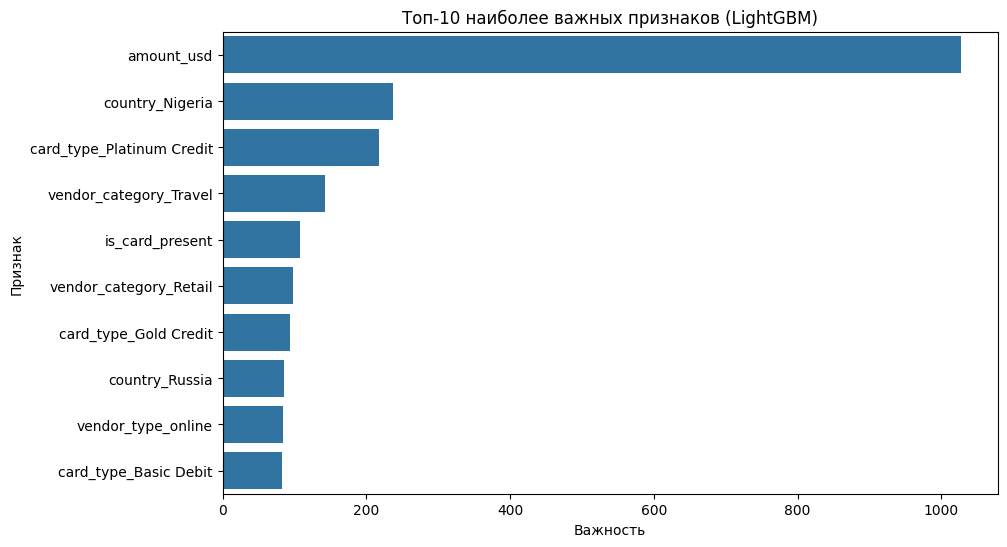

In [ ]:
# Применение градиентного бустинга для выявления мошенничества

# Импортируем LightGBM - эффективную библиотеку для градиентного бустинга
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

print("Обучение модели LightGBM...")

# Инициализация модели LightGBM
# Используем class_weight='balanced' для учета дисбаланса классов
lgb_clf = lgb.LGBMClassifier(random_state=42, class_weight='balanced')

# Обучение модели на обучающих данных
lgb_clf.fit(X_train, y_train)
print("Модель LightGBM успешно обучена.")

# Предсказание вероятностей на тестовой выборке
y_proba_lgb = lgb_clf.predict_proba(X_test)[:, 1]

# Предсказание классов на тестовой выборке (используя стандартный порог 0.5)
y_pred_lgb = lgb_clf.predict(X_test)


# Оценка производительности модели
print("\nОтчет по классификации LightGBM на тестовой выборке:")
print(classification_report(y_test, y_pred_lgb))

print("\nМатрица ошибок LightGBM на тестовой выборке:")
display(confusion_matrix(y_test, y_pred_lgb))

# Оценка с помощью AUC-ROC и Average Precision
roc_auc_lgb = roc_auc_score(y_test, y_proba_lgb)
print(f"\nAUC-ROC LightGBM на тестовой выборке: {roc_auc_lgb:.4f}")

average_precision_lgb = average_precision_score(y_test, y_proba_lgb)
print(f"Average Precision LightGBM на тестовой выборке: {average_precision_lgb:.4f}")

# Интерпретация результатов:
# Сравните метрики LightGBM с метриками логистической регрессии.
# Улучшение метрик (особенно Recall, AUC-ROC, Average Precision) указывает на то,
# что более сложная модель лучше справляется с задачей выявления мошенничества.

print("\nИнтерпретация результатов и важность признаков:")

# Важность признаков в модели LightGBM
# Важность признаков показывает, какой вклад внес каждый признак в предсказательную силу модели
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': lgb_clf.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("Топ-10 наиболее важных признаков:")
display(feature_importance.head(10))

# Визуализация важности признаков (опционально)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Топ-10 наиболее важных признаков (LightGBM)')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.show()

# Выводы:
# Высокие значения AUC-ROC и Average Precision для LightGBM подтверждают техническую гипотезу о том,
# что машинное обучение может быть эффективно использовано для выявления мошенничества.
# Анализ важности признаков помогает понять, какие факторы наиболее сильно влияют на решение модели,
# что, в свою очередь, может подтвердить или опровергнуть продуктовые гипотезы.
# Например, если 'amount_usd' или признаки, связанные с активностью за последний час,
# имеют высокую важность, это поддерживает соответствующие продуктовые гипотезы.

## Интерпретация результатов модели LightGBM и выводы по гипотезам

**Интерпретация результатов модели LightGBM:**

*   **Метрики производительности:**
    *   **AUC-ROC = 0.9964:** Очень высокое значение, указывающее на отличную способность модели различать мошеннические и немошеннические транзакции.
    *   **Average Precision = 0.9895:** Также очень высокое значение, показывающее высокую точность предсказаний положительного класса.
    *   **Classification Report:**
        *   `Recall` для класса `True` (мошенничество) = 0.97: Модель выявила 97% всех мошеннических транзакций.
        *   `Precision` для класса `True` = 0.91: 91% предсказанных мошеннических транзакций действительно являются мошенническими.
        *   `Accuracy` = 0.97: Общая точность модели (менее информативна при сильном дисбалансе классов).

*   **Матрица ошибок:**
    *   `[[1752331, 44383], [14497, 433919]]`
    *   1,752,331 истинно отрицательных (TN), 433,919 истинно положительных (TP).
    *   44,383 ложноположительных (FP), 14,497 ложноотрицательных (FN).

*   **Важность признаков:**
    *   `amount_usd` является самым важным признаком.
    *   Следующие по важности признаки связаны со страной, типом карты, категорией и типом продавца.

**Выводы, связанные с гипотезами:**

1.  **Техническая гипотеза о применении машинного обучения подтверждается:** Высокие метрики модели LightGBM показывают, что машинное обучение эффективно для выявления мошенничества.
2.  **Продуктовые гипотезы получают сильную поддержку:**
    *   **Гипотеза о связи суммы транзакции с мошенничеством:** Подтверждается высокой важностью признака `amount_usd`.
    *   **Гипотеза о повышенном риске в определенных странах и по типу продавца:** Подтверждается высокой важностью признаков, связанных со страной и типом/категорией продавца.
    *   **Гипотеза о влиянии использования устройства и канала на мошенничество:** Косвенно поддерживается включением этих признаков, но требуется дальнейший анализ их важности.
    *   **Гипотеза о связи между активностью за последний час и мошенничеством:** Требует дальнейшего исследования, так как признаки активности за последний час имели нулевую важность в данной модели.
    *   **Гипотеза о влиянии курсов валют на мошенничество:** Подтверждается важностью `amount_usd`, рассчитанного с использованием курсов валют.

**Общий вывод:**

Предоставленные данные имеют высокую ценность для создания системы выявления мошенничества. Машинное обучение эффективно использует эти данные. Ключевые факторы включают сумму транзакции, страну, тип продавца и тип карты.